# Classificador K-means com os dados do ENADE

## Métricas para avaliar os clusters

### 1. Após abrir os dados, iremos aplicar algumas métricas de clusterização.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', 95)
pd.set_option('display.max_rows', 15)

In [2]:
data = pd.read_csv('data/dados_enade_n.csv', sep=',')
dataNotNormalize = pd.read_csv('data/dados_enade_nn.csv', sep=',')

data

,ano,nota_geral,idade,sexo,recebeu_cota,recebeu_bolsa,trabalha,livros_ano,horas_estudo,pessoas_moradia,condicoes_salas_estudantes,condicoes_praticas_materiais,plano_ensino,avaliacao_curso,idade_comeco_graduacao,tempo_ocioso,tempo_cursado,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,ADS,BCC,EC,RC,SI,LCC,GTI,Regiao CO,Regiao N,Regiao NE,Regiao S,Regiao SE,IES privada,IES publica,Turno diurno,Turno integral,Turno noturno,EM particular,EM publico,Raca amarela,Raca branca,Raca indígena,Raca parda,Raca preta,Pai EF,Pai EM,Pai ES,Mae EF,Mae EM,Mae ES,Casado,Divorciado,Solteiro,Viúvo,Moradia cônjuge/filhos,Moradia individual/coletiva,Moradia parentes,Moradia universidade,Moradia sozinho,EM EJA/Supletivo,EM tradicional,EM magistério,EM técnico
0,2008,-1.614013,-0.154241,1,0,0,1,4,1,2,4,4,1,4,-0.645065,-0.720134,1.897073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,1.209940,-0.154241,1,0,0,1,1,2,2,3,3,3,4,-0.234159,0.020728,0.303653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,0.572958,0.455742,0,0,0,1,2,2,1,3,3,3,3,0.793107,0.514637,-1.289767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008,-1.529082,-0.154241,1,1,0,1,1,2,1,1,1,1,1,-0.028706,0.267683,-0.493057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,-0.801456,-0.873522,1,0,0,1,3,3,2,2,2,2,5,-0.781962,-0.620819,-0.387502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132577,2017,0.509352,-1.021606,1,0,0,0,0,1,5,4,4,3,5,-0.911930,-0.828166,-0.490963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
132578,2017,-1.034904,-0.301264,1,1,0,0,4,1,1,3,3,2,3,-0.189606,-0.163107,-0.490963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
132579,2017,-1.531549,1.139420,1,0,0,0,2,3,4,4,4,2,3,1.399506,0.501952,-1.121499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0

In [3]:
# tirar a coluna ano
columns = data.columns.tolist()
columns.pop(data.columns.tolist().index('ano'))
dataKmeans = data[columns]

X = dataKmeans.values

### SSE: Sum of squared errors test

In [18]:
sse = []
n1 = 1
n2 = 11

# de 1 a 11
for i in range(n1, n2):

    # crio a instancia KMeans
    kmeans = KMeans(n_clusters = i, init = 'random')
    
    # computa o algoritmo
    kmeans.fit(X)

    print('{}: {}'.format(i, kmeans.inertia_))

    # adiciono o valor do sse
    sse.append(kmeans.inertia_)

1: 3765711.7775112623
2: 3344741.2708261553
3: 3012068.1319789477
4: 2808091.3211461487
5: 2685046.316492742
6: 2598157.6179313473
7: 2532745.61800645
8: 2490026.765848483
9: 2453485.600727194
10: 2419204.7187850783


### Gráfico do método de Elbow para os clusters

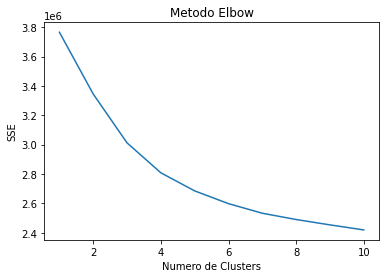

In [19]:
# ploto o gráfico
plt.plot(range(n1, n2), sse)
plt.title('Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('SSE')
plt.show()

### Identificar o ponto da curva de Elbow

In [26]:
kl = KneeLocator(range(n1, n2), sse, curve="convex", direction="decreasing")

print('{} clusters'.format(kl.elbow))

4 clusters


### Silhouette coefficients test

In [23]:
silhouetteCoefficient = []

for i in range(2, 11):

    # crio a instancia KMeans
    kmeans = KMeans(n_clusters = i, init = 'random')
    
    # computa o algoritmo
    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    print('{}: {}'.format(i, score))

    # adiciono o valor do score
    silhouetteCoefficient.append(score)

2: 0.2925888307016192
3: 0.11202879842725752
4: 0.11358922115396503
5: 0.09161328304846572
6: 0.08507643288706965
7: 0.08064469203986581
8: 0.07192707289188284
9: 0.06340517800185021
10: 0.06870851954252125


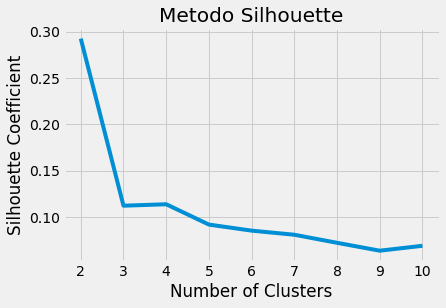

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouetteCoefficient)
plt.xticks(range(2, 11))
plt.title('Metodo Silhouette')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Executamos o kmeans com a melhor quantidade de clusters selecionada

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numberClusters = 3

# crio a instancia
kmeans = KMeans(n_clusters = numberClusters, init = 'random')

# executo o algoritmo
kmeans.fit(X)

label = kmeans.fit_predict(X)

### Distribuição dos nossos dados

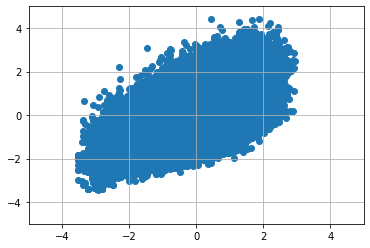

In [7]:
# posicionamento dos eixos x e y
plt.scatter(X[:,1], X[:,0])

# range de x
plt.xlim(-5, 5)

# range de y
plt.ylim(-5, 5)

# desenha a grade
plt.grid()

### Distribuição dos dados separados pelos clusters

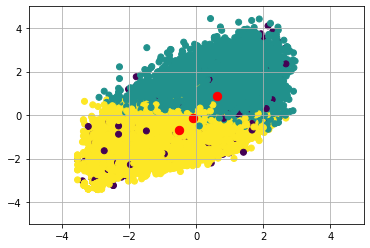

In [8]:
# posicionamento dos eixos x e y
plt.scatter(X[:,1], X[:,0], c=label)

# range de x
plt.xlim(-5, 5)

# range de y
plt.ylim(-5, 5)

# desenho a grade
plt.grid()

# posicao de cada centroide
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red')

# mostra o resultado
plt.show()

### Retorno o valor dos dados normalizados e salvo o cluster respectivo para cada aluno em um outro arquivo

In [7]:
columns = [
    'nota_geral', 
    # 'nota_formacao_geral', 
    # 'nota_obj_formacao_geral', 
    # 'nota_dis_formacao_geral', 
    # 'nota_componente_especifico', 
    # 'nota_obj_componente_especifico', 
    # 'nota_dis_componente_especifico', 
    'idade', 
    'idade_comeco_graduacao', 
    'tempo_ocioso', 
    'tempo_cursado'
]
    
data['cluster'] = kmeans.labels_.tolist()

for column in columns:
    data[column] = dataNotNormalize[column]

data.to_csv('data/dados_enade_cluster_' + str(numberClusters) + '.csv', index=False)

data

,ano,nota_geral,idade,sexo,recebeu_cota,recebeu_bolsa,trabalha,livros_ano,horas_estudo,pessoas_moradia,condicoes_salas_estudantes,condicoes_praticas_materiais,plano_ensino,avaliacao_curso,idade_comeco_graduacao,tempo_ocioso,tempo_cursado,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,ADS,BCC,EC,RC,SI,LCC,GTI,Regiao CO,Regiao N,Regiao NE,Regiao S,Regiao SE,IES privada,IES publica,Turno diurno,Turno integral,Turno noturno,EM particular,EM publico,Raca amarela,Raca branca,Raca indígena,Raca parda,Raca preta,Pai EF,Pai EM,Pai ES,Mae EF,Mae EM,Mae ES,Casado,Divorciado,Solteiro,Viúvo,Moradia cônjuge/filhos,Moradia individual/coletiva,Moradia parentes,Moradia universidade,Moradia sozinho,EM EJA/Supletivo,EM tradicional,EM magistério,EM técnico,cluster
0,2008,19.7,24,1,0,0,1,4,1,2,4,4,1,4,18,1,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2008,46.3,24,1,0,0,1,1,2,2,3,3,3,4,20,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2008,40.3,27,0,0,0,1,2,2,1,3,3,3,3,25,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2008,20.5,24,1,1,0,1,1,2,1,1,1,1,1,21,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2008,31.4,20,1,0,0,1,3,3,2,2,2,2,5,18,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132577,2017,46.8,20,1,0,0,0,0,1,5,4,4,3,5,18,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
132578,2017,26.9,25,1,1,0,0,4,1,1,3,3,2,3,23,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
132579,2017,20.5,35,1,0,0,0,2,3,4,4,4,2,3,34,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
132580,2017,52.0,25,1,0,0,0,2,2,4,1,4,4,5,23,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0